<a href="https://colab.research.google.com/github/gcosma/COP509/blob/main/LabSolutions/Lab_Exercise_(No_4b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Lab Exercise (No. 4b)**

**Task Overview**

1. Use Evaluation measures to evaluate the performance of the 2 given queries.

2. Briefly outline in bullets the main findings.

###***pre-work1: mount drive***

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


###***pre-work2: set datasets***

In [ ]:
data_path = "/content/drive/My Drive/Colab Notebooks/21COP509/LabDatasets/"
!ls "/content/drive/My Drive/Colab Notebooks/21COP509/LabDatasets/"

datasets = 'Arts5000' # ArtsAll, Arts5000


if datasets == 'ArtsAll':
  # Arts all
  data_all_reviews = 'ArtsReviews.txt'
  data_all_ratings = 'ArtsRatings.txt'
  data_train_reviews = 'ArtsReviews_train.txt'
  data_test_reviews = 'ArtsReviews_test.txt'
  data_train_ratings = 'ArtsRatings_train.txt'
  data_test_ratings = 'ArtsRatings_test.txt'
else:
  # Arts 5000
  data_all_reviews = 'Reduced_ArtsReviews_5000.txt'
  data_all_ratings = 'Reduced_ArtsRatings_5000.txt'
  data_train_reviews = 'ArtsReviews_5000_train.txt'
  data_test_reviews = 'ArtsReviews_5000_test.txt'
  data_train_ratings = 'ArtsRatings_5000_train.txt'
  data_test_ratings = 'ArtsRatings_5000_test.txt'

ArtsRatings_5000_test.txt   ArtsReviews_5000_train.txt	Reduced_ArtsRatings_5000.txt
ArtsRatings_5000_train.txt  glove.6B.100d.txt		Reduced_ArtsReviews_5000.txt
ArtsReviews_5000_test.txt   metamorphosis_clean.txt	review_polarity


##**1.fit the LSA model**

In [ ]:
from numpy import array
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from pandas import DataFrame
from matplotlib import pyplot
import random
import nltk
import numpy
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import rand
from sklearn.metrics.pairwise import cosine_similarity
from numpy import argsort
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from collections import Counter

nltk.download('stopwords')

# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
	# load doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# update counts
	vocab.update(tokens)

 # load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# save list to file
def save_list(lines, filename):
	# convert lines to a single blob of text
	data = '\n'.join(lines)
	# open file
	file = open(filename, 'w')
	# write text
	file.write(data)
	# close file
	file.close()

# split train and test
def random_sample(num1, num2):
    dataList = list(range(num1))
    TrainIndex = []
    for i in range(num2):
        randIndex = int(random.uniform(0,len(dataList)))
        TrainIndex.append(dataList[randIndex])
        del(dataList[randIndex])
    TestIndex = dataList
    return TrainIndex,TestIndex

# load doc into memory as lines
def load_doc_lines(filename):
	 file = open(filename,'rt')
	 lines = list()
   # read all text as lines
	 while 1:

		 line = file.readline()
		 if not line:
		   break
		 pass
		 lines.append(line.strip("\n"))
   # close the file
	 file.close()
	 return lines

# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()

	# convert to lower case
	tokens = [word.lower() for word in tokens]

 	# stemming of words
	from nltk.stem.porter import PorterStemmer
	porter = PorterStemmer()
	tokens = [porter.stem(word) for word in tokens]

	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

# load doc, clean and return line of tokens
def doc_to_line(doc):
	# load the doc
	# doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# filter by vocab
	# tokens = [w for w in tokens if w in vocab]
	return ' '.join(tokens)

# load all docs in a directory
def process_docs(files):
	lines = list()
	# walk through all files in the folder
	for doc in files:
		# print(len(doc))
		line = doc_to_line(doc)
		# add to list
		lines.append(line)
	return lines

# prepare words encoding of docs
def prepare_data(train_docs, mode, vocab):
	# encode training data set
	vectorizer = CountVectorizer(vocabulary=vocab)
	transformer = TfidfTransformer(norm='l2')
	Xtrain = transformer.fit_transform(vectorizer.fit_transform(train_docs))
	return Xtrain

# load the dataset #########################################
ArRe_train_lines = load_doc_lines(data_path + data_all_reviews)

train_docs = process_docs(ArRe_train_lines)

# generate vocabulary
vocab = []
for ll in train_docs:
  tt = ll.split()
  for ww in tt:
    if ww not in vocab:
      vocab.append(ww)
# print(vocab)
# print(len(vocab))

Xtrain = prepare_data(train_docs, 'tfidf', vocab)

trunc_SVD_model = TruncatedSVD(n_components=50)
approx_Xtrain = trunc_SVD_model.fit_transform(Xtrain)
print("Approximated Xtrain shape: " + str(approx_Xtrain.shape))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Approximated Xtrain shape: (5000, 50)


##**2.evaluation**


Query1: The pen is good.
Top 1 result: ID2591  Tyr blendy pens seemed good, but after a WEEK of using them they were all dryed out!! It's not worth it!
Top 2 result: ID4790  pens; but they run out of ink so quickly. i need to find a pen just as good but cheaper.
Top 3 result: ID2169  The pens do not work well at all. These are not good calligraphy pens, and if I hadn't thrown out the packaging, I would have returned it.
Top 4 result: ID2185  These pens are great if you need to do drawing or sketching with a very fine tip. I liked the quality of most of the pens, except I had one pen no# 2 which was almost dry (and I just got the package yesterday).These pens were not lasting ones. Many of them dried up pretty fast, and after 3 months all are dried. Otherwise, I think these are very good pens.
Top 5 result: ID4678  These were the very first inking pens I ever got, and I was shocked by how well they worked.First off, they come in a variety of sizes, from the fairly thick .05 to the deli

<ipython-input-4-19a29ae33c63>:115: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, y_axis, '-bo', color="purple", label="Query%d"%(j+1))


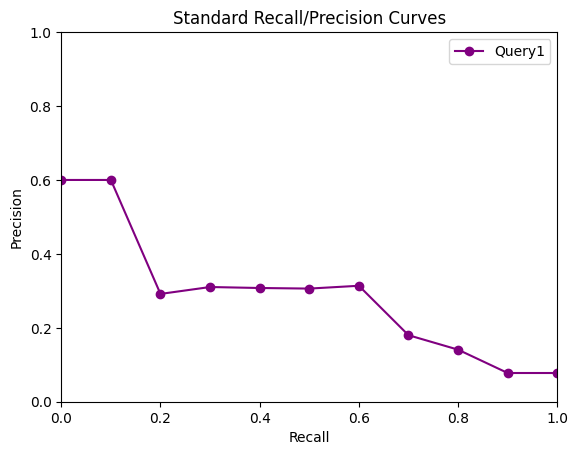


Query2: The pen is poor.
Top 1 result: ID1901  The pen itself was visibly as depicted: a Murano-style glass pen, with all the slight irregularities that should be expected of hand-shaped glass. I could not rate how the ink flowed from the pen, as the pen had been very poorly packaged and had arrived broken in two places. Most disappointing, as this pen was intended to be given as a gift.
Top 2 result: ID571  The package sucks as a pen holder except if you're traveling and do not want the pens rolling around loose anywhere.The pens are awesome but if you're heavy handed you NEED to be careful, the smallest nibswear down fast.
Top 3 result: ID1346  I'll start by saying I don't use this pen for drafting. I love to write with this pen because the lines get really dark, are extremely consistent, and the feel of writing with it is very satisfying, like a sharp pencil or a fountain pen.These pens do require you to keep it at a roughly 80-90 degree angle to maintain ink flow, but I don't mind

<ipython-input-4-19a29ae33c63>:115: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, y_axis, '-bo', color="purple", label="Query%d"%(j+1))


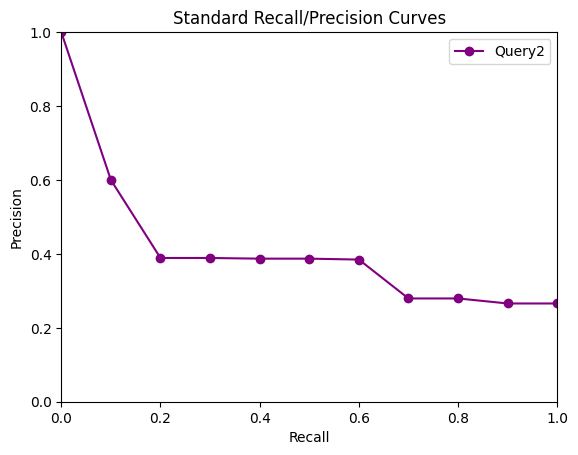


Average Recall, average Precision, average F1-measure: 
average Recall@1~10:  [0.02 0.06 0.06 0.08 0.13 0.13 0.13 0.15 0.15 0.15]
average Precision@1~10:  [0.5  0.75 0.5  0.5  0.6  0.5  0.43 0.44 0.39 0.35]
average F1measure@1~10:  [0.04 0.12 0.11 0.14 0.21 0.2  0.19 0.22 0.21 0.21]


<ipython-input-4-19a29ae33c63>:142: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, y_axis, '-bo', color="blue", label="Average")


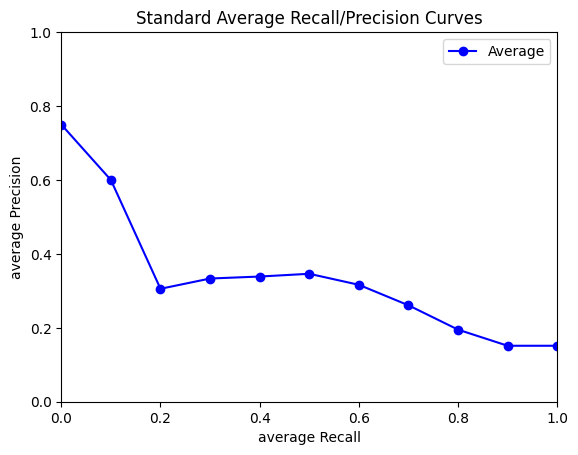

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# preprocess query
def preprocess_query(review, mode, vocab):
	# clean
	tokens = clean_doc(review)
	# convert to line
	line = ' '.join(tokens)
	# encode
	vectorizer = CountVectorizer(vocabulary=vocab)
	transformer = TfidfTransformer(norm='l2')
	encoded = transformer.fit_transform(vectorizer.fit_transform([line]))
	return encoded

# Interplot Precision for standard Recall
def InterplotPrecision(p=0.1, Precision=None, Recall=None):

    if p >= 1.0:
        p = 0.9

    Mark = np.zeros(2)
    l = 0
    r = 0
    for i in range(len(Recall)):
        if Recall[i] >= p and Mark[0] == 0:
            l = i
            Mark[0] = 1
        if Recall[i] >= p + 0.1 and Mark[1] == 0:
        # if Recall[i] >= 1.0 and Mark[1] == 0:
            r = i
            Mark[1] = 1
    y = max(Precision[l:(r+1)])
    return y

# obtain y axis for R/P curve
def compute_RP_yaxis(Precision=None, Recall=None):
  y_axis = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
  for i in range(11):
    pInput = 0.1 * i
    y_axis[i] = InterplotPrecision(p=pInput, Precision=Precision, Recall=Recall)
  return y_axis

# compute Recall, Precision, F1-measure
def compute_R_P_F1(re_mark=None, QuRe_ID =None):
  Recall = []
  Precision = []
  F1measure = []
  for i in range(len(re_mark)):
    r = sum(re_mark[:(i+1)])
    Re = r/(len(QuRe_ID))
    Pr = r/(i+1)
    # avoid divisor to be 0
    FD = Re + Pr
    if FD == 0:
      FD=1
    F1 = 2*Re*Pr/FD

    Recall.append(Re)
    Precision.append(Pr)
    F1measure.append(F1)
  return Recall, Precision, F1measure

queries = ['The pen is good.',
           'The pen is poor.']

re_ID = [[24,337,500,959,1346,1537,1746,1761,1892,2128,2185,2339,2603,3161,3181,3192,3202,3627,3796,4161,4293,4678,4758,4790,4798],
         [224,353,368,415,462,571,856,880,903,906,1377,1532,1784,1901,2061,2690,2719,3380,3925,4164,4279,4833,4852]]

AllRecall = []
AllPrecision = []
AllF1measure = []
# loop queries
j = 0
for query in queries:
  # retrieval
  encoded_query = preprocess_query(query, 'tfidf', vocab)
  transformed_query = trunc_SVD_model.transform(encoded_query)
  similarities = cosine_similarity(approx_Xtrain, transformed_query)

  # rank the index
  indexes = np.argsort(similarities.flat)[::-1]

  # Mark the relevant index
  re_mark = []
  for i in range(len(indexes)):
    if (indexes[i]+1) in re_ID[j]:
      re_mark.append(1)
    else:
      re_mark.append(0)
  # print(re_mark)

  # compute Recall, Precision, F1-measure
  Recall, Precision, F1measure = compute_R_P_F1(re_mark=re_mark, QuRe_ID=re_ID[j])

  print('\n' + 'Query%d: '%(j+1) + query)
  for i in range(10):
    print("Top " + str(i+1) + ' result: ID%d '%(indexes[i]+1), ArRe_train_lines[indexes[i]])
  Recall = np.array(Recall)
  Precision = np.array(Precision)
  F1measure = np.array(F1measure)
  # print(re_mark)
  print("Recall@1~10: ", np.around(Recall[:10],2))
  print("Precision@1~10: ", np.around(Precision[:10],2))
  print("F1measure@1~10: ", np.around(F1measure[:10],2))

  # save
  AllRecall.append(Recall)
  AllPrecision.append(Precision)
  AllF1measure.append(F1measure)

  # plot R/P curve
  x_axis = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  y_axis = compute_RP_yaxis(Precision=Precision, Recall=Recall)
  plt.plot(x_axis, y_axis, '-bo', color="purple", label="Query%d"%(j+1))
  plt.xlim(0, 1)
  plt.ylim(0, 1)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Standard Recall/Precision Curves')
  plt.legend()
  plt.show()

  j += 1

# compute average Recall, average Precision, average F1-measure
AllRecall = np.array(AllRecall)
AllPrecision = np.array(AllPrecision)
AllF1measure = np.array(AllF1measure)
AveRecall = (AllRecall[0] + AllRecall[1])/2
AvePrecision = (AllPrecision[0] + AllPrecision[1])/2
AveF1measure = (AllF1measure[0] + AllF1measure[1])/2

print("\nAverage Recall, average Precision, average F1-measure: ")
print("average Recall@1~10: ", np.around(AveRecall[:10],2))
print("average Precision@1~10: ", np.around(AvePrecision[:10],2))
print("average F1measure@1~10: ", np.around(AveF1measure[:10],2))

# plot average R/P curve
x_axis = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
y_axis = compute_RP_yaxis(Precision=AvePrecision, Recall=AveRecall)
plt.plot(x_axis, y_axis, '-bo', color="blue", label="Average")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('average Recall')
plt.ylabel('average Precision')
plt.title('Standard Average Recall/Precision Curves')
plt.legend()
plt.show()